# ÁLGEBRA LINEAL COMPUTACIONAL - TP2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects  as so
from sklearn.decomposition import PCA

## CANASTA BASICA

### PREPROCESAMIENTO DE LOS DATOS

##### CONSIGNA 1:

In [3]:
tabla_nutricional = pd.read_csv("tabla_nutricional.csv", delimiter = ";")
tabla_nutricional

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,153.900,283.50,0.189,NaN,4.990,2.190,0.520,NaN
1,Leche entera en polvo,11.00,4.510,2.840,2.730,44.440,99.00,0.060,NaN,1.620,0.770,0.060,NaN
2,Yogurt,19.00,2.450,0.510,0.490,7.990,17.67,0.005,NaN,0.320,0.140,0.014,NaN
3,Queso crema,1.66,0.060,0.100,0.370,1.230,0.93,NaN,NaN,0.360,0.110,0.010,NaN
4,Queso cuartirolo,3.66,0.060,0.770,0.800,20.840,16.54,NaN,NaN,0.760,0.210,0.020,NaN
5,Queso rallar,1.66,0.060,0.550,0.450,20.420,15.78,NaN,NaN,0.360,0.110,0.008,NaN
6,Huevo,16.00,NaN,1.920,1.890,21.600,8.96,0.400,NaN,0.510,0.720,0.460,NaN
7,Asado,50.00,NaN,9.300,7.500,33.000,7.50,1.120,NaN,2.930,3.270,0.189,NaN
8,Paleta,15.00,NaN,3.000,1.500,9.900,1.80,0.340,NaN,0.880,0.980,0.056,NaN
9,Hueso c/carne,15.00,NaN,3.000,1.500,9.900,1.80,0.340,NaN,0.880,0.980,0.056,NaN


In [4]:
tabla_nutricional["Na (mg)"].sum()

3337.714

In [5]:
tabla_nutricional = tabla_nutricional.fillna(0)
tabla_nutricional["Na (mg)"] = tabla_nutricional["Na (mg)"] / 1000
tabla_nutricional.rename(columns = {"Na (mg)":"Na (gr)"}, inplace = True)
tabla_nutricional["Ca (mg)"] = tabla_nutricional["Ca (mg)"] / 1000
tabla_nutricional.rename(columns = {"Ca (mg)":"Ca (gr)"}, inplace = True)
tabla_nutricional["Fe (mg)"] = tabla_nutricional["Fe (mg)"] / 1000
tabla_nutricional.rename(columns = {"Fe (mg)":"Fe (gr)"}, inplace = True)
tabla_nutricional

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.153900,0.28350,0.000189,0.00,4.990,2.190,0.520,0.00
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.044440,0.09900,0.000060,0.00,1.620,0.770,0.060,0.00
2,Yogurt,19.00,2.450,0.510,0.490,0.007990,0.01767,0.000005,0.00,0.320,0.140,0.014,0.00
3,Queso crema,1.66,0.060,0.100,0.370,0.001230,0.00093,0.000000,0.00,0.360,0.110,0.010,0.00
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.020840,0.01654,0.000000,0.00,0.760,0.210,0.020,0.00
5,Queso rallar,1.66,0.060,0.550,0.450,0.020420,0.01578,0.000000,0.00,0.360,0.110,0.008,0.00
6,Huevo,16.00,0.000,1.920,1.890,0.021600,0.00896,0.000400,0.00,0.510,0.720,0.460,0.00
7,Asado,50.00,0.000,9.300,7.500,0.033000,0.00750,0.001120,0.00,2.930,3.270,0.189,0.00
8,Paleta,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00


##### CONSIGNA 2:

In [6]:
def cumple_margenes_de_ingesta(tabla_nutricional):
    cantidad = tabla_nutricional["HC (gr)"].sum() + tabla_nutricional["Proteinas (gr)"].sum() + tabla_nutricional["Grasas (gr)"].sum() + tabla_nutricional["Na (gr)"].sum() + tabla_nutricional["Ca (gr)"].sum() + tabla_nutricional["Fe (gr)"].sum() + tabla_nutricional["Azucares Libres (gr)"].sum() + tabla_nutricional["Fibra (gr)"].sum()
    porc_grasas = (tabla_nutricional["Grasas (gr)"].sum() * 100)/cantidad
    porc_AGS = (tabla_nutricional["AGS (gr)"].sum() * 100)/cantidad
    porc_azucar = (tabla_nutricional["Azucares Libres (gr)"].sum() * 100)/cantidad
    porc_proteinas = (tabla_nutricional["Proteinas (gr)"].sum() * 100)/cantidad
    porc_AGp = (tabla_nutricional["AG p (gr)"].sum() * 100)/cantidad
    if (porc_grasas > 30) or (porc_AGS > 10) or  (porc_azucar > 10) or (porc_proteinas < 10) or (tabla_nutricional["Na (gr)"].sum() > 5) or (tabla_nutricional["Fibra (gr)"].sum() < 20) or (porc_AGp > 11):
        print("FALSO")
    else:
        print("VERDADERO")

In [7]:
cumple_margenes_de_ingesta(tabla_nutricional)

VERDADERO


### ANALISIS EN COMPONENTES PRINCIPALES

##### CONSIGNA 3:

Como nos piden que utilicemos el valor nutricional, vamos a eliminar las columna de las cantidades y vamos a indexar la de alimentos para que sean todos numeros y poder hacer el analisis

In [8]:
tabla_nutricional_PCA = tabla_nutricional

In [9]:
tabla_nutricional_PCA = tabla_nutricional.set_index('Alimento')
tabla_nutricional_PCA = tabla_nutricional_PCA.drop("Cantidad (gr/ml)",  axis = 1)

In [10]:
tabla_nutricional_PCA

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,
Leche fluida entera,12.420,8.370,7.830,0.153900,0.28350,0.000189,0.00,4.990,2.190,0.520,0.00
Leche entera en polvo,4.510,2.840,2.730,0.044440,0.09900,0.000060,0.00,1.620,0.770,0.060,0.00
Yogurt,2.450,0.510,0.490,0.007990,0.01767,0.000005,0.00,0.320,0.140,0.014,0.00
Queso crema,0.060,0.100,0.370,0.001230,0.00093,0.000000,0.00,0.360,0.110,0.010,0.00
Queso cuartirolo,0.060,0.770,0.800,0.020840,0.01654,0.000000,0.00,0.760,0.210,0.020,0.00
Queso rallar,0.060,0.550,0.450,0.020420,0.01578,0.000000,0.00,0.360,0.110,0.008,0.00
Huevo,0.000,1.920,1.890,0.021600,0.00896,0.000400,0.00,0.510,0.720,0.460,0.00
Asado,0.000,9.300,7.500,0.033000,0.00750,0.001120,0.00,2.930,3.270,0.189,0.00
Paleta,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00


Ahora, calculando autovalores y sus autovectores asociados, vamos a analizar componentes principales para ver cuantos son necesarios para explicar la mayor parte de los datos. Tambien hacemos un grafico para poder visualizarlo mejor

Con 1 componentes principales, se explica el 58.308360246323055 % de los datos
Con 2 componentes principales, se explica el 73.55139885288928 % de los datos
Con 3 componentes principales, se explica el 88.2674769973896 % de los datos
Con 4 componentes principales, se explica el 95.41668268143843 % de los datos
Con 5 componentes principales, se explica el 97.24984588550511 % de los datos
Con 6 componentes principales, se explica el 98.13321456621946 % de los datos
Con 7 componentes principales, se explica el 98.83824964763241 % de los datos
Con 8 componentes principales, se explica el 99.46182392323986 % de los datos
Con 9 componentes principales, se explica el 99.9649482071063 % de los datos
Con 10 componentes principales, se explica el 99.99930586920716 % de los datos
Con 11 componentes principales, se explica el 99.99999999999997 % de los datos


C:\Users\bau\Nueva carpeta\anaconda\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


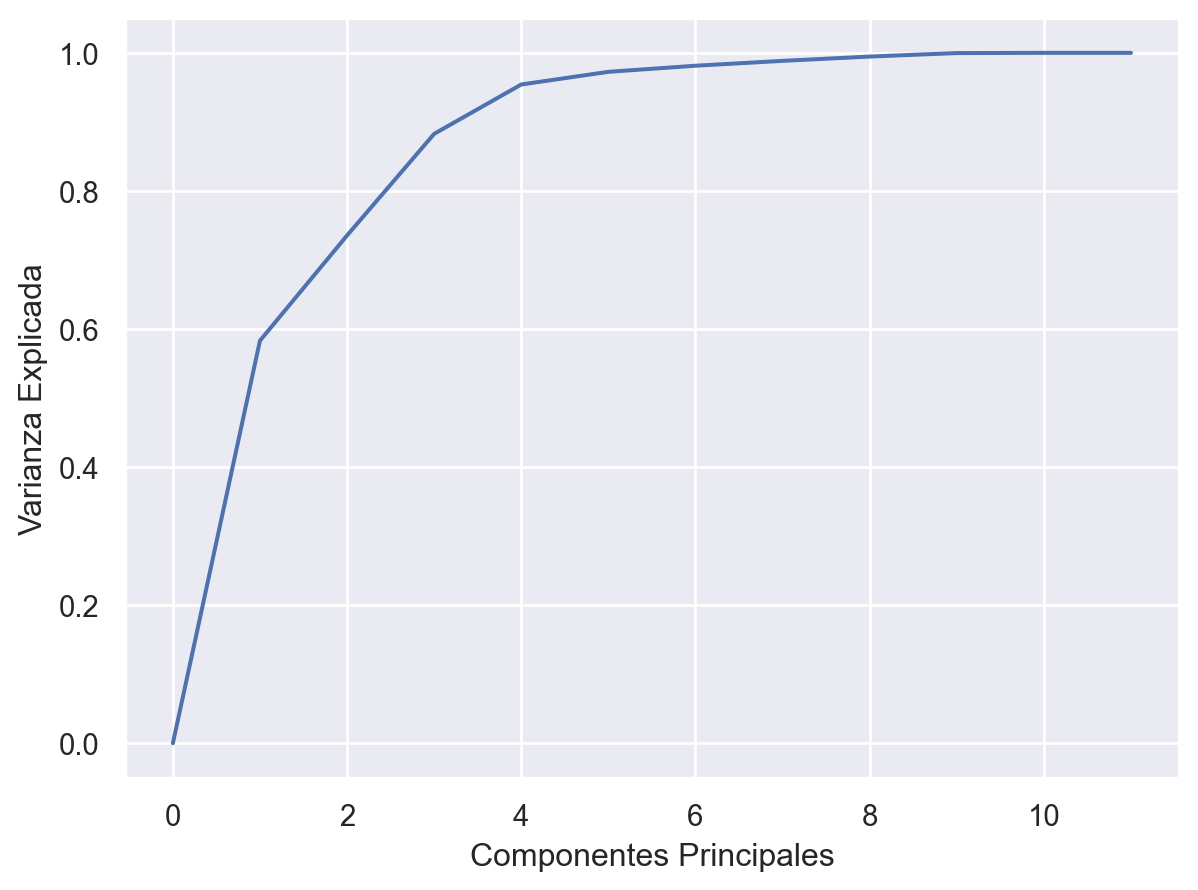

In [11]:
[U, S, Vh] = np.linalg.svd(tabla_nutricional_PCA)
tot = S.sum()
var_exp = [0]
a = 0
for i in range (0,len(S)):
    a += S[i]/tot
    var_exp.append(a)
    print("Con", i+1, "componentes principales, se explica el", var_exp[i+1] * 100, "% de los datos")
exp = {"Componentes Principales": [0,1,2,3,4,5,6,7,8,9,10,11], "Varianza Explicada": var_exp}
(so.Plot(data = exp, x = "Componentes Principales", y = "Varianza Explicada").add(so.Line()))

Como pudimos ver, hasta los primeros 3 componentes principales va aumentando la varianza explicada significativamente, mientras que despues sigue aumentando pero mucho mas lento. Es por esto que vamos a tomar para el PCA 3 componentes principales que explican el 88% de los datos.

Ahora, vamos a realizar el PCA para tres componentes y luego graficamos cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. 

In [12]:
tabla_nutricional_PCAn = (tabla_nutricional_PCA - tabla_nutricional_PCA.mean()) / tabla_nutricional_PCA.std()
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(tabla_nutricional_PCAn)
df_pca = pd.DataFrame(data=componentes_principales, index=tabla_nutricional["Alimento"], columns=['Componente 1', 'Componente 2', "Componente 3"])
df_pca

,Componente 1,Componente 2,Componente 3
Alimento,,,
Leche fluida entera,3.082801,4.374555,6.277109
Leche entera en polvo,0.393040,1.159744,2.085836
Yogurt,-0.709747,-0.163666,0.283687
Queso crema,-0.899872,-0.203441,0.024696
Queso cuartirolo,-0.649790,0.112549,0.448353
Queso rallar,-0.765474,-0.149925,0.300232
Huevo,-0.320341,0.312671,0.067156
Asado,1.684799,2.871787,0.730901
Paleta,-0.186120,0.461131,0.180902


Para hacer el grafico vamos a usar la componente 1 y la componente 2 que son las que explican la mayor parte de los datos

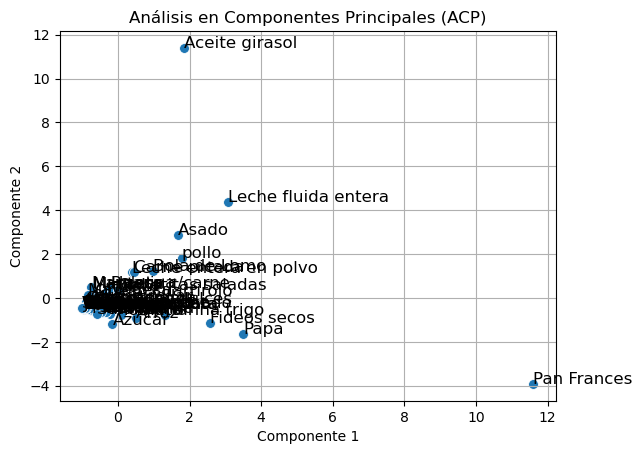

In [13]:
# Graficar los resultados
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca, s=50)

# Añadir etiquetas a los puntos
for i, txt in enumerate(df_pca.index):
    plt.annotate(txt, (df_pca.iloc[i, 0], df_pca.iloc[i, 1]), fontsize=12)

plt.title('Análisis en Componentes Principales (ACP)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

Viendo el grafico, podemos observar que la mayoria de los alimentos forman parte de un unico cluster, pero que hay unos pocos alimentos como el Pan Frances y el Aceite de girasol que estan lejos de este cluster como si fueran outliers. 

Lo que podemos interpretar es que los alimentos que forman parte del cluster tienen perfiles nutricionales muy similares entre si y comparten características comunes en cuanto a sus valores de proteínas, azúcares, grasas, sodio, calcio, hierro, fibra, etc. En cambio los alimentos que estan lejos del cluster tienen perfiles nutricionales diferentes a los demas. Estos alimentos pueden tener una cantidad significativamente mayor o menor de uno o más nutrientes, lo que los separa de los otros en el espacio de componentes principales.

## AUMENTOS DE PRECIOS

##### CONSIGNA 4:

In [14]:
precios=pd.read_csv("consumidores_libres.csv", delimiter = ";")

In [15]:
df_pca_cons = df_pca.iloc[[33,27,44,30,28,6,26,0,56,16,17,19,31,15,22,21,11,7,8,10]]
df_pca_cons

,Componente 1,Componente 2,Componente 3
Alimento,,,
Aceite girasol,1.841840,11.393994,-3.961432
Arroz,0.509555,-0.924606,-0.381800
Azucar,-0.155987,-1.211078,-2.526255
Fideos secos,2.566252,-1.124842,-0.525220
Harina trigo,1.322718,-0.755742,-0.476568
Huevo,-0.320341,0.312671,0.067156
Pan Frances,11.600213,-3.919674,-1.335397
Leche fluida entera,3.082801,4.374555,6.277109
Yerba,-0.998378,-0.454018,-0.104873


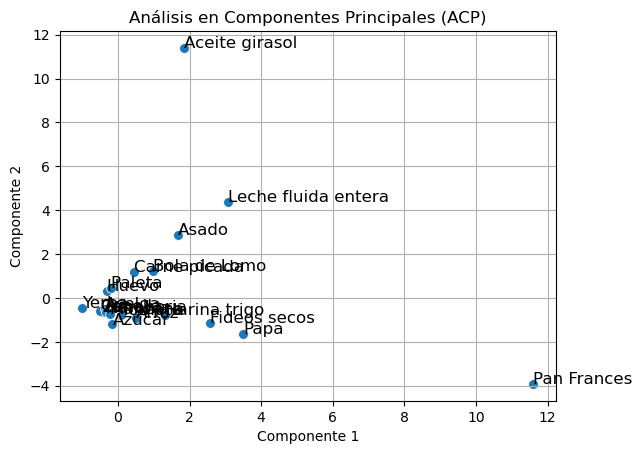

In [16]:
#plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca_cons, s=50)

# Añadir etiquetas a los puntos
for i, txt in enumerate(df_pca_cons.index):
    plt.annotate(txt, (df_pca_cons.iloc[i, 0], df_pca_cons.iloc[i, 1]), fontsize=12)

plt.title('Análisis en Componentes Principales (ACP)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

## Cuadrados minimos

Creamos un dataframe que contenga el precio de cada nutriente usando el precio el precio de los alimentos de los cuales tenemos informacion y el porcentaje de cada nutriente en el.

In [52]:
tabla_nutricional = pd.read_csv("tabla_nutricional.csv", delimiter = ";")
precios=pd.read_csv("consumidores_libres.csv", delimiter = ";")

In [53]:
#tabla_nutricional = tabla_nutricional.fillna(0)
tabla_nutricional=tabla_nutricional.set_index('Alimento')


In [54]:
tabla_nutricional

,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,,
Leche fluida entera,270.00,12.420,8.370,7.830,153.900,283.50,0.189,NaN,4.990,2.190,0.520,NaN
Leche entera en polvo,11.00,4.510,2.840,2.730,44.440,99.00,0.060,NaN,1.620,0.770,0.060,NaN
Yogurt,19.00,2.450,0.510,0.490,7.990,17.67,0.005,NaN,0.320,0.140,0.014,NaN
Queso crema,1.66,0.060,0.100,0.370,1.230,0.93,NaN,NaN,0.360,0.110,0.010,NaN
Queso cuartirolo,3.66,0.060,0.770,0.800,20.840,16.54,NaN,NaN,0.760,0.210,0.020,NaN
Queso rallar,1.66,0.060,0.550,0.450,20.420,15.78,NaN,NaN,0.360,0.110,0.008,NaN
Huevo,16.00,NaN,1.920,1.890,21.600,8.96,0.400,NaN,0.510,0.720,0.460,NaN
Asado,50.00,NaN,9.300,7.500,33.000,7.50,1.120,NaN,2.930,3.270,0.189,NaN
Paleta,15.00,NaN,3.000,1.500,9.900,1.80,0.340,NaN,0.880,0.980,0.056,NaN


In [55]:
productos = [
    'Leche fluida entera', 'LECHE c/VIT.FORT', 'Yogurt', 'Queso crema', 
    'Queso cuartirolo', 'Queso rallar', 'HUEVOS COLOR DOCENA', 'ASADO', 'PALETA', 
    'Hueso c/carne', 'CARNE PICADA COMUN', 'BOLA DE LOMO', 'Higado', 'pollo', 
    'pescado', 'ACELGA PAQUETE', 'ZANAHORIAS', 'TOMATE PERITA', 'Lechuga', 'CEBOLLA', 
    'Zapallo', 'MANZANA', 'NARANJA', 'Mandarina', 'pera', 'Banana', 
    'PAN FRESCO', 'ARROZ GRANO FINO', 'HARINA DE TRIGO', 'Harina maiz', 'FIDEOS GUISEROS', 
    'PAPA NEGRA', 'Batata', 'ACEITE COCINERO GIRASOL', 'Manteca', 'Margarina', 'Mayonesa', 
    'Mortadela', 'Paleta cocida', 'Galletitas saladas', 'Galletitas dulces', 
    'Dulce de leche', 'Mermelada', 'Dulce de batata', 'AZUCAR LEDESMA', 'Gaseosa', 
    'Jugo conc.', 'Arvejas en lata', 'Tomate envasado', 'Caldo conc.', 
    'Cerveza', 'Vino', 'Soda', 'Sal fina', 'Vina re', 'Cafe', 'YERBA TARAGUI'
]
tabla_nutricional.index = productos

In [56]:
for fecha in ["31/12/2023", "31/1/2024", "29/2/2024", "31/3/2024", "30/4/2024"]:
    precios[f"Precio por gr/ml ({fecha})"] = precios[fecha] / precios["Cantidad"]
precios_g = precios.drop(precios.columns[1:7], axis=1)
#precios_g.sort_values(by="PRODUCTOS").set_index("PRODUCTOS", inplace=True)

In [97]:
precios.head()

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Precio por gr/ml (31/12/2023),Precio por gr/ml (31/1/2024),Precio por gr/ml (29/2/2024),Precio por gr/ml (31/3/2024),Precio por gr/ml (30/4/2024)
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,1.666667,2.066667,2.30,2.4,2.466667
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,1.650000,2.300000,2.80,3.1,3.550000
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,1.990000,2.050000,2.05,2.1,2.100000
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,3.200000,3.980000,4.30,4.4,4.580000
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,0.950000,1.250000,1.35,1.5,1.690000


In [58]:
df_merged = precios_g.merge(tabla_nutricional, left_on="PRODUCTOS", right_index=True)

In [59]:
df_merged.head()

,PRODUCTOS,Precio por gr/ml (31/12/2023),Precio por gr/ml (31/1/2024),Precio por gr/ml (29/2/2024),Precio por gr/ml (31/3/2024),Precio por gr/ml (30/4/2024),Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,ACEITE COCINERO GIRASOL,1.666667,2.066667,2.30,2.4,2.466667,34.0,NaN,NaN,34.00,NaN,NaN,NaN,NaN,3.710,7.820,20.980,NaN
1,ARROZ GRANO FINO,1.650000,2.300000,2.80,3.1,3.550000,36.0,28.51,2.48,NaN,1.44,3.24,0.25,NaN,NaN,NaN,NaN,0.97
2,AZUCAR LEDESMA,1.990000,2.050000,2.05,2.1,2.100000,43.0,43.00,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN
3,FIDEOS GUISEROS,3.200000,3.980000,4.30,4.4,4.580000,56.0,40.65,7.15,0.88,3.92,10.08,2.40,NaN,0.126,0.104,0.362,1.34
4,HARINA DE TRIGO,0.950000,1.250000,1.35,1.5,1.690000,45.0,30.92,4.63,1.21,4.50,4.95,0.68,NaN,0.190,0.110,0.510,1.44


In [60]:

for fecha in ["31/12/2023", "31/1/2024", "29/2/2024", "31/3/2024", "30/4/2024"]:
    for nutriente in ["HC (gr)", "Proteinas (gr)", "Grasas (gr)"]:
        df_merged[f"Precio por gr de {nutriente} ({fecha})"] = (df_merged[nutriente]/df_merged["Cantidad (gr/ml)"])* df_merged[f"Precio por gr/ml ({fecha})"] 


# Seleccionar columnas relevantes
columnas_relevantes = ["PRODUCTOS", "Cantidad (gr/ml)", "HC (gr)", "Proteinas (gr)", "Grasas (gr)"] + [col for col in df_merged.columns if "Precio por gr de" in col]
preciosnutrientes = df_merged[columnas_relevantes]

preciosnutrientes.head()

,PRODUCTOS,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Precio por gr de HC (gr) (31/12/2023),Precio por gr de Proteinas (gr) (31/12/2023),Precio por gr de Grasas (gr) (31/12/2023),Precio por gr de HC (gr) (31/1/2024),Precio por gr de Proteinas (gr) (31/1/2024),Precio por gr de Grasas (gr) (31/1/2024),Precio por gr de HC (gr) (29/2/2024),Precio por gr de Proteinas (gr) (29/2/2024),Precio por gr de Grasas (gr) (29/2/2024),Precio por gr de HC (gr) (31/3/2024),Precio por gr de Proteinas (gr) (31/3/2024),Precio por gr de Grasas (gr) (31/3/2024),Precio por gr de HC (gr) (30/4/2024),Precio por gr de Proteinas (gr) (30/4/2024),Precio por gr de Grasas (gr) (30/4/2024)
0,ACEITE COCINERO GIRASOL,34.0,NaN,NaN,34.00,NaN,NaN,1.666667,NaN,NaN,2.066667,NaN,NaN,2.300000,NaN,NaN,2.400000,NaN,NaN,2.466667
1,ARROZ GRANO FINO,36.0,28.51,2.48,NaN,1.306708,0.113667,NaN,1.821472,0.158444,NaN,2.217444,0.192889,NaN,2.455028,0.213556,NaN,2.811403,0.244556,NaN
2,AZUCAR LEDESMA,43.0,43.00,NaN,NaN,1.990000,NaN,NaN,2.050000,NaN,NaN,2.050000,NaN,NaN,2.100000,NaN,NaN,2.100000,NaN,NaN
3,FIDEOS GUISEROS,56.0,40.65,7.15,0.88,2.322857,0.408571,0.050286,2.889054,0.508161,0.062543,3.121339,0.549018,0.067571,3.193929,0.561786,0.069143,3.324589,0.584768,0.071971
4,HARINA DE TRIGO,45.0,30.92,4.63,1.21,0.652756,0.097744,0.025544,0.858889,0.128611,0.033611,0.927600,0.138900,0.036300,1.030667,0.154333,0.040333,1.161218,0.173882,0.045442


In [61]:
promedio=[]
fechas= ["31/12/2023", "31/1/2024", "29/2/2024", "31/3/2024", "30/4/2024"]

for fecha in fechas:
    lista=[]
    for nutriente in ["HC (gr)", "Proteinas (gr)", "Grasas (gr)"]:
        lista.append(preciosnutrientes[f"Precio por gr de {nutriente} ({fecha})"].mean())
    promedio.append(lista)
a=pd.DataFrame(promedio,index=fechas, columns=["promedio precio HC (gr)", "promedio precio Proteinas (gr)", "promedio precio Grasas (gr)"])
a=a.reset_index()
a=a.rename(columns={"index": "fechas"})
a


,fechas,promedio precio HC (gr),promedio precio Proteinas (gr),promedio precio Grasas (gr)
0,31/12/2023,0.698897,0.335997,0.468218
1,31/1/2024,0.845055,0.396447,0.559592
2,29/2/2024,0.935297,0.456123,0.641143
3,31/3/2024,0.992548,0.481867,0.677372
4,30/4/2024,1.054937,0.500335,0.702891


In [62]:
#Veo a las fechas como 
A=[[0,1,2,3,4], 
  [1,1,1,1,1]] 
yhc=[[0.698897,0.845055,0.935297,0.992548,1.054937]]
yP=[[0.335997,0.396447,0.456123,0.481867,0.500335]]
yGc=[[0.468218,0.559592,0.641143,0.677372,0.702891]]
#x=[a,b] 
coef_hc=np.linalg.solve(A@np.transpose(A), A @ np.transpose(yhc))
coef_P=np.linalg.solve(A@np.transpose(A), A @ np.transpose(yP))
coef_G=np.linalg.solve(A@np.transpose(A), A @ np.transpose(yGc))

In [63]:
from datetime import datetime
fechas_ordinal=a.index
fechas_dt = [datetime.strptime(fecha, '%d/%m/%Y') for fecha in fechas]
linea_hc = np.polyval(coef_hc, fechas_ordinal)
linea_P = np.polyval(coef_P, fechas_ordinal)
linea_G = np.polyval(coef_G, fechas_ordinal)


In [64]:
def cadrados(y):
    A=[[0,1,2,3,4],[1,1,1,1,1]] 
    y=np.array(y)
    coef=np.linalg.solve(A@np.transpose(A), A @ np.transpose(y))
    linea= np.polyval(coef, fechas_ordinal)
    return [coef,linea]

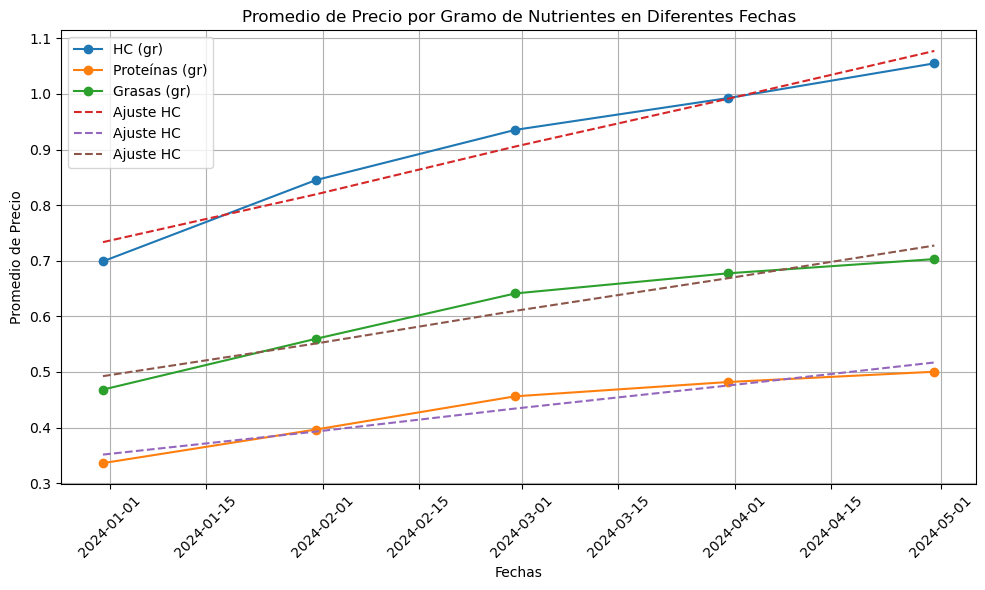

In [65]:

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.plot(fechas_dt , a["promedio precio HC (gr)"], marker='o', label='HC (gr)')
plt.plot(fechas_dt , a["promedio precio Proteinas (gr)"], marker='o', label='Proteínas (gr)')
plt.plot(fechas_dt , a["promedio precio Grasas (gr)"], marker='o', label='Grasas (gr)')
# Graficar las líneas con coeficientes específicos
plt.plot(fechas_dt , linea_hc, label='Ajuste HC', linestyle='--')
plt.plot(fechas_dt , linea_P, label='Ajuste HC', linestyle='--')
plt.plot(fechas_dt , linea_G, label='Ajuste HC', linestyle='--')
# Añadir títulos y etiquetas
plt.title('Promedio de Precio por Gramo de Nutrientes en Diferentes Fechas')
plt.xlabel("Fechas")
plt.ylabel('Promedio de Precio') 
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
precios_g.head()

,PRODUCTOS,Precio por gr/ml (31/12/2023),Precio por gr/ml (31/1/2024),Precio por gr/ml (29/2/2024),Precio por gr/ml (31/3/2024),Precio por gr/ml (30/4/2024)
0,ACEITE COCINERO GIRASOL,1.666667,2.066667,2.30,2.4,2.466667
1,ARROZ GRANO FINO,1.650000,2.300000,2.80,3.1,3.550000
2,AZUCAR LEDESMA,1.990000,2.050000,2.05,2.1,2.100000
3,FIDEOS GUISEROS,3.200000,3.980000,4.30,4.4,4.580000
4,HARINA DE TRIGO,0.950000,1.250000,1.35,1.5,1.690000


In [67]:
datos=[]
precios_g2=precios_g.drop(precios_g.columns[0], axis=1)

for i in range(len(precios_g)):
    l=cadrados(precios_g2.iloc[i].tolist())
    datos.append(l)


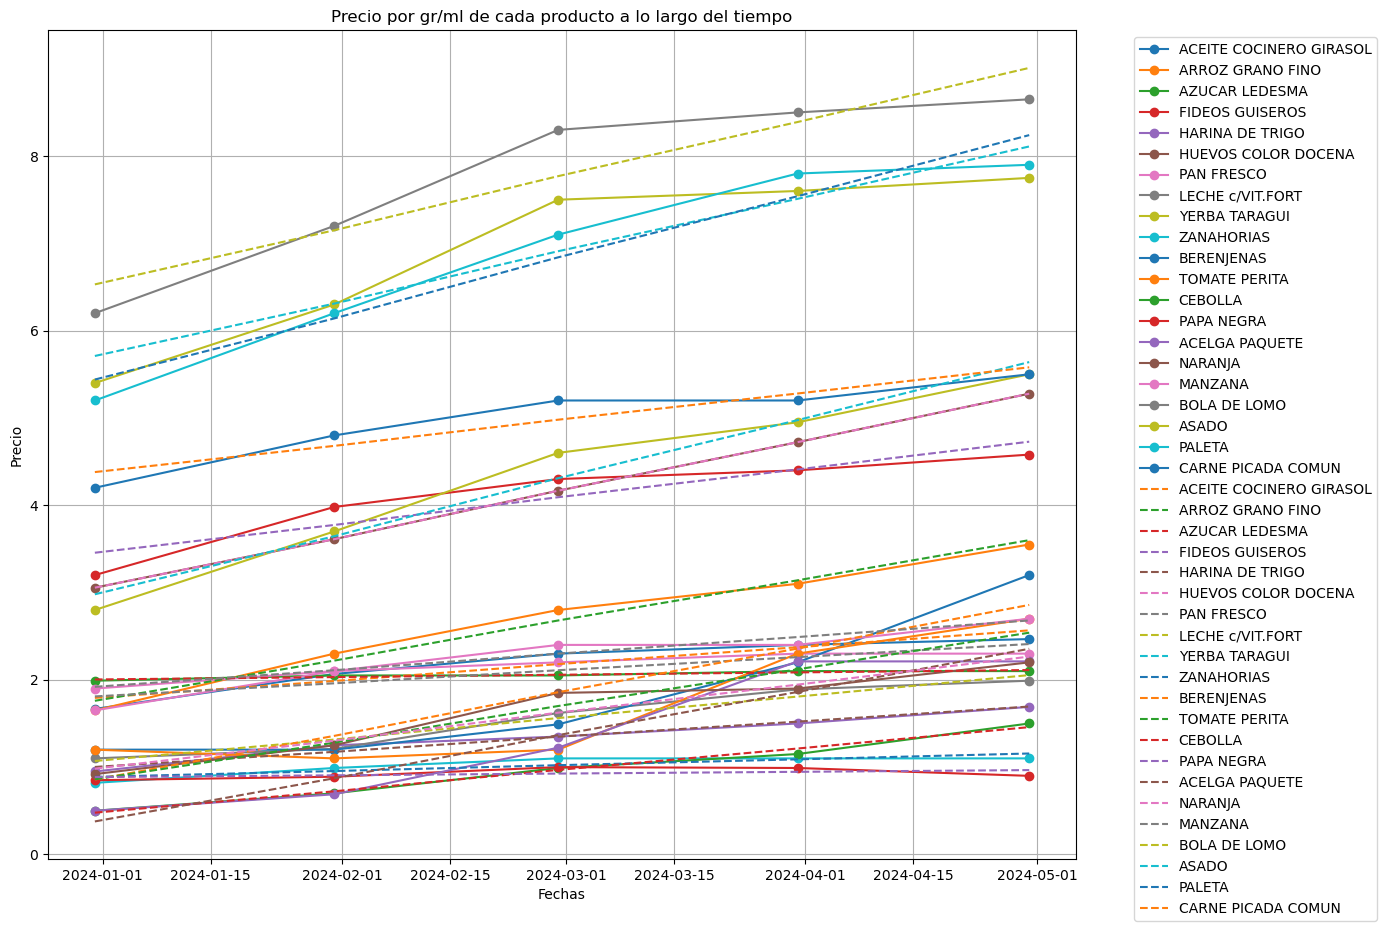

In [68]:
# Convertir el DataFrame a formato largo para facilitar el gráfico
df_long = pd.melt(precios_g, id_vars=['PRODUCTOS'], var_name='Fecha', value_name='Precio')

# Convertir la columna Fecha a datetime

# Graficar los datos
plt.figure(figsize=(14, 10))
for producto in df_long['PRODUCTOS'].unique():
    df_producto = df_long[df_long['PRODUCTOS'] == producto]
    plt.plot(fechas_dt, df_producto['Precio'], marker='o', label=producto)
for i in range(len(datos)):
    plt.plot( fechas_dt, datos[i][1],label=precios_g.loc[i,"PRODUCTOS"] ,linestyle='--')
    
plt.title('Precio por gr/ml de cada producto a lo largo del tiempo')
plt.xlabel("Fechas")
plt.ylabel('Precio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
resultados=[]
fechas_interes = ['31/12/2023', '31/1/2024', '29/2/2024', '31/3/2024', '30/4/2024']
# Calcular aumentos para cada producto y nutriente
for index, row in precios_g.iterrows():
    producto = row['PRODUCTOS']
    inicio = row['Precio por gr/ml (31/12/2023)']
    final = row['Precio por gr/ml (30/4/2024)']
    aumento = ((final - inicio) / inicio) * 100
    resultados.append({
                'Producto': producto,
                'Aumento (%)': aumento
            })

# Crear dataframe con los resultados
Aumentos = pd.DataFrame(resultados)



In [96]:
Aumentos

,Producto,Aumento (%)
0,ACEITE COCINERO GIRASOL,48.000000
1,ARROZ GRANO FINO,115.151515
2,AZUCAR LEDESMA,5.527638
3,FIDEOS GUISEROS,43.125000
4,HARINA DE TRIGO,77.894737
5,HUEVOS COLOR DOCENA,72.727273
6,PAN FRESCO,39.393939
7,LECHE c/VIT.FORT,80.909091
8,YERBA TARAGUI,96.428571
9,ZANAHORIAS,34.146341
